In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('./data/churn.xls', sheet_name='churn')

In [5]:
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Phone'],
      dtype='object')

In [6]:
X = df[['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge']]

In [7]:
y = df['Churn']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.8)

## Pipelines

- Way of applying consecutive transformations/models to data.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline

In [14]:
pipe = make_pipeline(SelectKBest(k=5), LogisticRegression(solver='lbfgs'))

In [15]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function f_classif at 0x0000015BA5301DC8>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [16]:
pipe.score(X_test, y_test)

0.848575712143928

In [18]:
y_pred = pipe.predict(X_test)

### Example: Choosing the correct number of features.

In [23]:
Ks = range(2,17)
scores = []
for k in Ks:
    pipe = make_pipeline(SelectKBest(k=k), LogisticRegression(solver='lbfgs'))
    pipe.fit(X_train, y_train);
    scores.append(pipe.score(X_train, y_train));

C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

Text(0, 0.5, 'Accuracy')

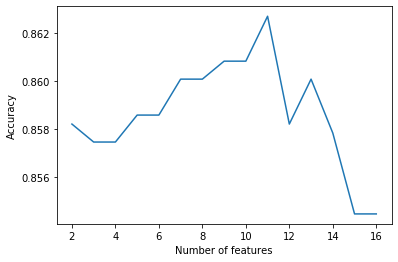

In [25]:
plt.plot(Ks, scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')